In [2]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [3]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(phyloseq)
#library(biome)
library(phyloseq)
#library(metagenomeSeq)
library(tibble)
library(ANCOMBC)
library("tidyverse")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.8     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [5]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"))  %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV)  
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))



Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [137]:
sample_info_tab_16S$SCTLD_status = factor(sample_info_tab_16S$SCTLD_status,
                                  c("Vulnerable", "Endemic", "Epidemic")) 

In [138]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [287]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples2 & Alias!="AcroporaDisease"
                       )

ps.coral


ps.coral_TL_reef =subset_samples(ps.coral, Biome=="Field")
ps.coral_TL_reef
                 
ps.coral_TL_meso =subset_samples(ps.coral, Biome=="Aquaria")
ps.coral_TL_meso    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 1039 samples ]
sample_data() Sample Data:       [ 1039 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [140]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral
  
ps.coral_TL_reef = filter_taxa(ps.coral_TL_reef, function(x) sum(x > 5 ) > (0.20*length(x)), TRUE)
ps.coral_TL_reef
                          
ps.coral_TL_meso = filter_taxa(ps.coral_TL_meso, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral_TL_meso                                            


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 204 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 204 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 292 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 292 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 253 taxa and 1039 samples ]
sample_data() Sample Data:       [ 1039 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 253 taxa by 10 taxonomic ranks ]

In [28]:
out = ancombc(phyloseq = ps.coral_TL_reef, formula = "SCTLD_status", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="SCTLD_status" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.001, global = TRUE)

res = out$res
res_global = out$res_global

,Feature.ID,SCTLD_statusEndemic,SCTLD_statusEpidemic
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.974272,0.000000
2,a8412eaf88b7b351a096ce924639f628,6.209457,4.105425
3,b12f1ebb5d05e1c88a9f265adb80fc55,0.000000,5.345045
4,5ea4e6d172010676d104e0d06b74eb20,0.000000,0.000000
5,7df259fe05818b722e6f40845a657dc8,0.000000,0.000000
6,ca349f9a464af37e05d4e51c6a162ba3,0.000000,0.000000


,Feature.ID,SCTLD_statusEndemicSD,SCTLD_statusEpidemicSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0.4225235,0.0000000
2,a8412eaf88b7b351a096ce924639f628,0.2460410,0.2197928
3,b12f1ebb5d05e1c88a9f265adb80fc55,0.0000000,0.2683181
4,5ea4e6d172010676d104e0d06b74eb20,0.0000000,0.0000000
5,7df259fe05818b722e6f40845a657dc8,0.0000000,0.0000000
6,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.0000000


,Feature.ID,SCTLD_statusEpidemic,SCTLD_statusEpidemicSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,0.000000,0.0000000,Vulnerable
2,a8412eaf88b7b351a096ce924639f628,4.105425,0.2197928,Epidemic
3,b12f1ebb5d05e1c88a9f265adb80fc55,5.345045,0.2683181,Epidemic
4,5ea4e6d172010676d104e0d06b74eb20,0.000000,0.0000000,Vulnerable
5,7df259fe05818b722e6f40845a657dc8,0.000000,0.0000000,Vulnerable
6,ca349f9a464af37e05d4e51c6a162ba3,0.000000,0.0000000,Vulnerable


,Feature.ID,Sig
,<chr>,<lgl>
1,a8412eaf88b7b351a096ce924639f628,TRUE
2,b12f1ebb5d05e1c88a9f265adb80fc55,TRUE
3,c6b98c58f5a8f184cc1b130f66f944ab,TRUE
4,c91441ff2784a4d8df6eca1b945e16e3,TRUE
5,c9ec8d7403b1ce7a8e1661e6f4dc5646,TRUE
6,f824a5cd4147ee5e2bdf1b275924896b,TRUE


[1] 65 15

,Feature.ID,SCTLD_statusEpidemic,SCTLD_statusEpidemicSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
1,a8412eaf88b7b351a096ce924639f628,4.105425,0.2197928,Epidemic,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,o__Alteromonadales_ f__Pseudoalteromonadaceae_ g__Pseudoalteromonas,f__Pseudoalteromonadaceae,g__Pseudoalteromonas,s__Pseudoalteromonas_sp.,0.6666667,ASV_96944,TRUE
2,b12f1ebb5d05e1c88a9f265adb80fc55,5.345045,0.2683181,Epidemic,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE
3,c6b98c58f5a8f184cc1b130f66f944ab,7.777280,0.1826853,Epidemic,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,0.7500000,ASV_114300,TRUE
4,c91441ff2784a4d8df6eca1b945e16e3,-5.333771,0.2866875,Vulnerable,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,o__Oceanospirillales_ f__Endozoicomonadaceae_ g__Endozoicomonas,f__Endozoicomonadaceae,g__Endozoicomonas,s__uncultured_bacterium,1.0000000,ASV_115613,TRUE
5,c9ec8d7403b1ce7a8e1661e6f4dc5646,-6.018919,0.3239671,Vulnerable,d__Bacteria,p__Marinimicrobia_(SAR406_clade),c__Marinimicrobia_(SAR406_clade),o__Marinimicrobia_(SAR406_clade),o__Marinimicrobia_(SAR406_clade)_ f__Marinimicrobia_(SAR406_clade)_ g__Marinimicrobia_(SAR406_clade),f__Marinimicrobia_(SAR406_clade),g__Marinimicrobia_(SAR406_clade),s__uncultured_bacterium,1.0000000,ASV_116139,TRUE
6,f824a5cd4147ee5e2bdf1b275924896b,-4.719982,0.2080193,Vulnerable,d__Archaea,p__Thermoplasmatota,c__Thermoplasmata,o__Marine_Group_II,o__Marine_Group_II_ f__Marine_Group_II_ g__Marine_Group_II,f__Marine_Group_II,g__Marine_Group_II,s__uncultured_archaeon,1.0000000,ASV_142885,TRUE


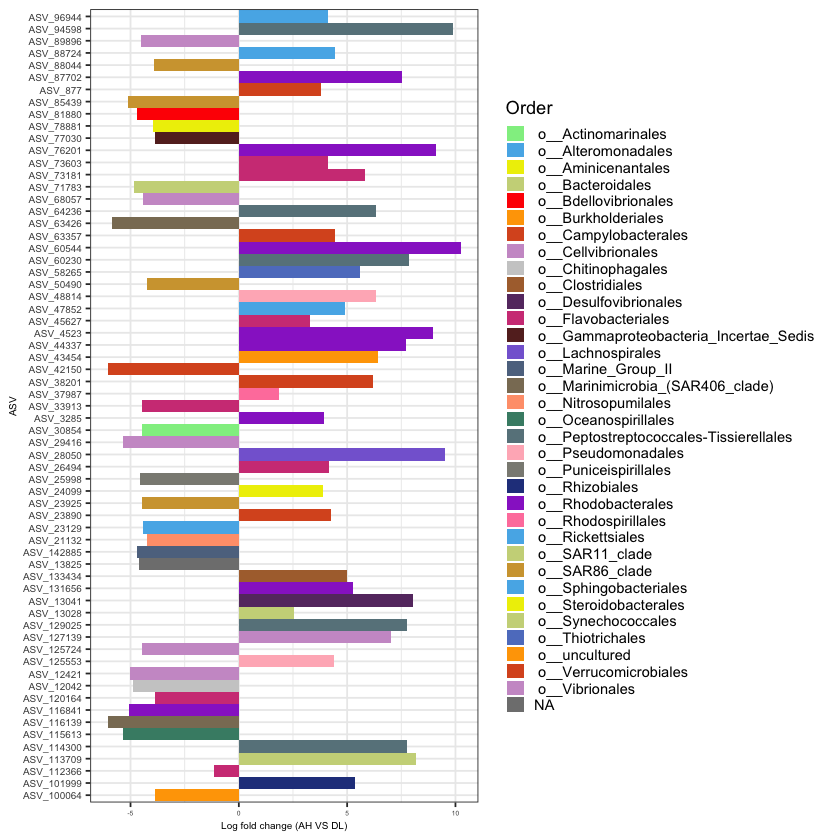

In [282]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, SCTLD_statusEpidemic, SCTLD_statusEpidemicSD)%>%
  mutate(group = ifelse(SCTLD_statusEpidemic > 0, "Epidemic", "Vulnerable"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig)


sigs=res$diff_abn %>% as.data.frame() %>%
select(SCTLD_statusEpidemic)  %>%
filter(SCTLD_statusEpidemic=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=SCTLD_statusEpidemic)
head(sigs)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

dim(df_fig1)
head(df_fig1)


as.data.frame(df_fig1) %>% 
#filter(tissue_typeDL > 1.5 | tissue_typeDL < 1.5) %>%
ggplot(
           aes(x = SCTLD_statusEpidemic, y = ASVs, fill=Order)
              ) + 
  geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
  theme_bw() + 
 # theme(legend.position = "none",
  #     panel.grid.minor.x = element_blank()) +
  
#geom_errorbar(aes(xmin = tissue_typeDL - tissue_typeDLSD, xmax = tissue_typeDL + tissue_typeDLSD),
 #               width = 0.2,
  #              position = position_dodge(0.03), color = "#999999", alpha=0.5) + 
scale_fill_manual(values=c("lightgreen","#56B4E9","yellow2","#CBD588","red", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588",
                          "#D1A33D","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588", "lightgreen","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                          "lightgreen","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588",
                          "#D1A33D","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5" )) +
  labs(y = "ASV", x = "Log fold change (AH VS DL)") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.y = element_text(size =6)) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.x = element_text(size =8)) +
#theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.8, , keyheight =.70, ncol=1))



#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/skeleton_type.png",
 #       width = 5, height = 5, units = "in", dpi=250)

df_fig_SS = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% 
filter(SCTLD_statusEpidemic > 2 | SCTLD_statusEpidemic < -2)  %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Tissue Slurry\nSkeleton")



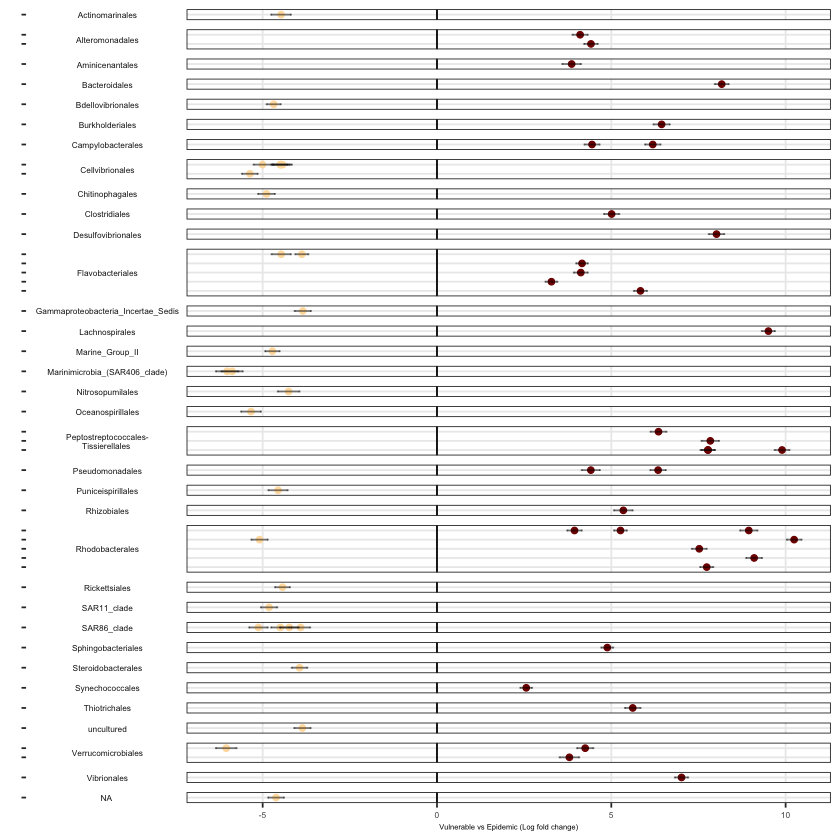

In [283]:
fig_sigs_epi = as.data.frame(df_fig_SS) %>%
#filter(SCTLD_statusEpidemic > 1.5 | SCTLD_statusEpidemic < -1.5) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
ggplot( 
           aes(SCTLD_statusEpidemic, y = Genus)
              ) + 
geom_point(aes(color=group)) +
   #geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
  theme_bw() + 
 theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
  
geom_errorbar(aes(xmin = SCTLD_statusEpidemic - SCTLD_statusEpidemicSD, xmax = SCTLD_statusEpidemic + SCTLD_statusEpidemicSD),
                width = 0.2,
                position = position_dodge(0.03), color = "black", alpha=0.5) + 
#scale_fill_manual(values=c("#40B5AD", "#6F8FAF")) +
 labs(y = "", x = "Vulnerable vs Epidemic (Log fold change)") + 
#theme(strip.background = element_rect(fill="white")) +
scale_color_manual(values=c(
  "#800000",  "#FFDEAD"
)) +
theme(axis.title.x = element_text(size = 4.5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =5)) +
theme(strip.text.y = element_blank()) +
#theme(axis.text.y=element_blank()) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=5)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5)
fig_sigs_epi

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_epi.png",
       width = 6, height = 6, units = "in", dpi=250)

In [280]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, SCTLD_statusEndemic, SCTLD_statusEndemicSD)%>%
  mutate(group = ifelse(SCTLD_statusEndemic > 0, "Endemic", "Vulnerable"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig)


sigs=res$diff_abn %>% as.data.frame() %>%
select(SCTLD_statusEndemic)  %>%
filter(SCTLD_statusEndemic=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=SCTLD_statusEndemic)
head(sigs)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

dim(df_fig1)
head(df_fig1)

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/skeleton_type.png",
 #       width = 5, height = 5, units = "in", dpi=250)

df_fig_SS = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% 
filter(SCTLD_statusEndemic > 2 | SCTLD_statusEndemic < -2)  %>% 
unite("Taxa", Order:Genus, remove = FALSE) 

,Feature.ID,SCTLD_statusEndemic,SCTLD_statusEpidemic
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.974272,0.000000
2,a8412eaf88b7b351a096ce924639f628,6.209457,4.105425
3,b12f1ebb5d05e1c88a9f265adb80fc55,0.000000,5.345045
4,5ea4e6d172010676d104e0d06b74eb20,0.000000,0.000000
5,7df259fe05818b722e6f40845a657dc8,0.000000,0.000000
6,ca349f9a464af37e05d4e51c6a162ba3,0.000000,0.000000


,Feature.ID,SCTLD_statusEndemicSD,SCTLD_statusEpidemicSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0.4225235,0.0000000
2,a8412eaf88b7b351a096ce924639f628,0.2460410,0.2197928
3,b12f1ebb5d05e1c88a9f265adb80fc55,0.0000000,0.2683181
4,5ea4e6d172010676d104e0d06b74eb20,0.0000000,0.0000000
5,7df259fe05818b722e6f40845a657dc8,0.0000000,0.0000000
6,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.0000000


,Feature.ID,SCTLD_statusEndemic,SCTLD_statusEndemicSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,-5.974272,0.4225235,Vulnerable
2,a8412eaf88b7b351a096ce924639f628,6.209457,0.2460410,Endemic
3,b12f1ebb5d05e1c88a9f265adb80fc55,0.000000,0.0000000,Vulnerable
4,5ea4e6d172010676d104e0d06b74eb20,0.000000,0.0000000,Vulnerable
5,7df259fe05818b722e6f40845a657dc8,0.000000,0.0000000,Vulnerable
6,ca349f9a464af37e05d4e51c6a162ba3,0.000000,0.0000000,Vulnerable


,Feature.ID,Sig
,<chr>,<lgl>
1,944c108b6e81ffecad1fda219fbe53f9,TRUE
2,a8412eaf88b7b351a096ce924639f628,TRUE
3,c6b98c58f5a8f184cc1b130f66f944ab,TRUE
4,c91441ff2784a4d8df6eca1b945e16e3,TRUE
5,2043c02d0849ae7bba53ee266ac15c49,TRUE
6,f1957bdaaeb908a1ebb0c01a42b0db7b,TRUE


[1] 81 15

,Feature.ID,SCTLD_statusEndemic,SCTLD_statusEndemicSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.974272,0.4225235,Vulnerable,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Ga0077536,o__Ga0077536_ f__Ga0077536_ g__Ga0077536,f__Ga0077536,g__Ga0077536,s__uncultured_bacterium,1.0000000,ASV_85339,TRUE
2,a8412eaf88b7b351a096ce924639f628,6.209457,0.2460410,Endemic,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,o__Alteromonadales_ f__Pseudoalteromonadaceae_ g__Pseudoalteromonas,f__Pseudoalteromonadaceae,g__Pseudoalteromonas,s__Pseudoalteromonas_sp.,0.6666667,ASV_96944,TRUE
3,c6b98c58f5a8f184cc1b130f66f944ab,4.410189,0.1766622,Endemic,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,0.7500000,ASV_114300,TRUE
4,c91441ff2784a4d8df6eca1b945e16e3,-7.298420,0.2899410,Vulnerable,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,o__Oceanospirillales_ f__Endozoicomonadaceae_ g__Endozoicomonas,f__Endozoicomonadaceae,g__Endozoicomonas,s__uncultured_bacterium,1.0000000,ASV_115613,TRUE
5,2043c02d0849ae7bba53ee266ac15c49,5.804094,0.2651716,Endemic,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,o__Synechococcales_ f__Cyanobiaceae_ g__Prochlorococcus_MIT9313,f__Cyanobiaceae,g__Prochlorococcus_MIT9313,NA,1.0000000,ASV_18705,TRUE
6,f1957bdaaeb908a1ebb0c01a42b0db7b,5.262908,0.2404425,Endemic,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Puniceispirillales,o__Puniceispirillales_ f__SAR116_clade_ g__SAR116_clade,f__SAR116_clade,g__SAR116_clade,NA,1.0000000,ASV_138991,TRUE


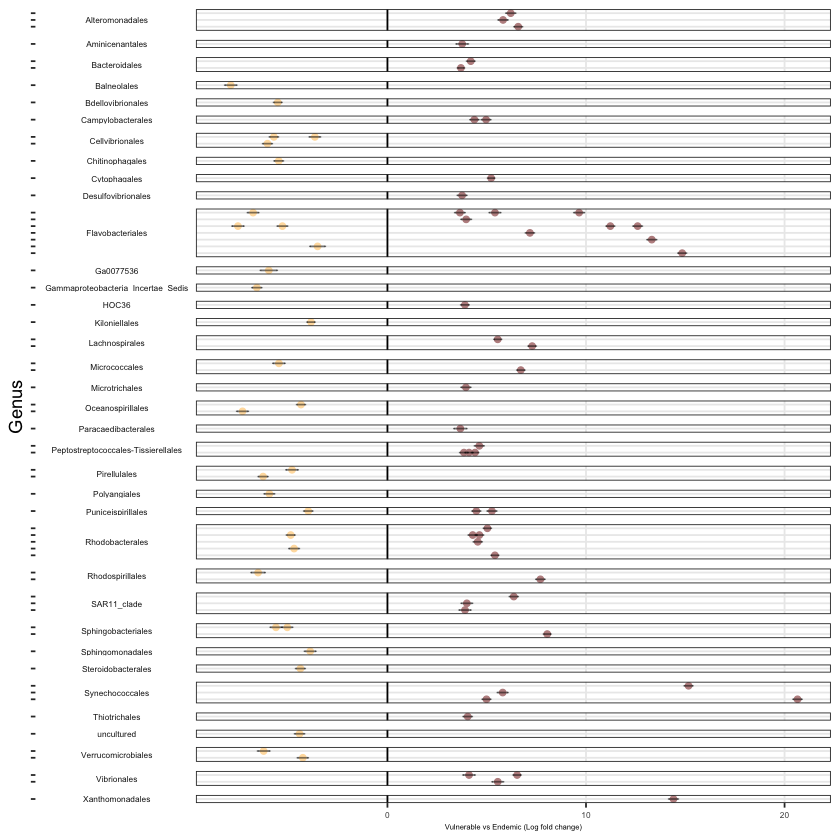

In [281]:
fig_sigs_end = as.data.frame(df_fig_SS) %>%
#filter(SCTLD_statusEpidemic > 1.5 | SCTLD_statusEpidemic < -1.5) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%
#mutate_if(
 #               is.character, 
  #              stringr::str_replace_all, 
   #             pattern = "Peptostreptococcales-Tissierellales", 
    #            replacement = "Peptostreptococcales-\nTissierellales")  %>%
ggplot( 
           aes(SCTLD_statusEndemic, y = Genus)
              ) + 
geom_point(aes(color=group)) +
   #geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
 theme(legend.position = "none",
    panel.grid.minor.x = element_blank()) +
  theme_bw() + 

  
geom_errorbar(aes(xmin = SCTLD_statusEndemic - SCTLD_statusEndemicSD, xmax = SCTLD_statusEndemic + SCTLD_statusEndemicSD),
                width = 0.2,
                position = position_dodge(0.03), color = "black", alpha=0.5) + 
#scale_fill_manual(values=c("#40B5AD", "#6F8FAF")) +
 labs(y = "Genus", x = "Vulnerable vs Endemic (Log fold change)") + 
#theme(strip.background = element_rect(fill="white")) +
scale_color_manual(values=c(
 "#BC8F8F", "#FFDEAD"
)) +
theme(axis.title.x = element_text(size = 4.5)) +
#theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =5)) +
#theme(axis.text.y=element_blank()) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5) +
 theme(legend.position = "none",
    panel.grid.minor.x = element_blank())
fig_sigs_end

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_end.png",
       width = 6, height = 6, units = "in", dpi=250)

In [70]:
ps.coral_TL_reef =subset_samples(ps.coral, Biome=="Field")
ps.coral_TL_reef

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [72]:
?phyloseq::rarefy_even_depth

In [291]:
ps_rare <- phyloseq::rarefy_even_depth(ps.coral_TL_reef, rngseed = 123, replace = TRUE, sample.size=1000)           


`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

28 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


1356d-tf-h-mc-m_S40M.cav.DCC.D1.4.26.19CNAT1c-719-9CNAT1c-917-253298

...

80004OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [292]:
ps_rare
head(phyloseq::sample_sums(ps_rare))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39451 taxa and 1909 samples ]
sample_data() Sample Data:       [ 1909 samples by 64 sample variables ]
tax_table()   Taxonomy Table:    [ 39451 taxa by 10 taxonomic ranks ]

102tiss_S3 220tiss_S33 222tiss_S34  225tis_S40 232tiss_S41 262tiss_S35 
       1000        1000        1000        1000        1000        1000

In [106]:
colnames(sample_info_tab_16S)

[1] "SampleID"                        "BioSample"                      
 [3] "Run"                             "SRA_accession"                  
 [5] "Lab"                             "Experiment"                     
 [7] "Alias"                           "Study"                          
 [9] "Collection_ID"                   "Species_counts"                 
[11] "collection_time"                 "collection_year"                
[13] "collection_month"                "collection_date"                
[15] "collected_by"                    "environment_.biome."            
[17] "Biome"                           "Study_dvide"                    
[19] "latitude"                        "longitude"                      
[21] "country"                         "reef_name"                      
[23] "reef_abbr"                       "reef_type"                      
[25] "SCTLD_status"                    "SCTLD_site_duration"            
[27] "depth"                           "temperature"                    
[29] "salinity"                        "pH"                             
[31] "nutrientdatacollected."          "sample_type"                    
[33] "binary_algal_contact"            "binary_disease"                 
[35] "binary_bleaching"                "tissue_type"                    
[37] "field_host_family_id"            "field_host_genus_id"            
[39] "field_host_species_id"           "species_code"                   
[41] "project_colony_code"             "colony_max_diameter"            
[43] "colony_max_height"               "colony_old_mortality"           
[45] "colony_recent_mortality_disease" "colony_percent_diseased"        
[47] "lesion_distribution"             "lesion_start"                   
[49] "lesion_rate"                     "lesion_margin"                  
[51] "disease_colony_sample_distance"  "complex_robust"                 
[53] "dna_extraction_method"           "X16S_variable_region"           
[55] "primer_names"                    "forwardPrimer"                  
[57] "ReversePrimer"                   "linkerPrimerSequence"           
[59] "platform"                        "platformChemistry"              
[61] "sequencing_facility"             "barcodes"                       
[63] "basepairs"                       "notes"

In [293]:
div <- data.frame(
  "Observed" = phyloseq::estimate_richness(ps_rare, measures = "Observed"),
  "Shannon" = phyloseq::estimate_richness(ps_rare, measures = "Shannon"),
    "Reef" = phyloseq::sample_data(ps_rare)$reef_name,
    "Disease" = phyloseq::sample_data(ps_rare)$tissue_type,
  #"PD" = picante::pd(samp = data.frame(t(data.frame(phyloseq::otu_table(ps_rare)))), tree = phyloseq::phy_tree(ps_rare))[, 1],
  "Zone" = phyloseq::sample_data(ps_rare)$SCTLD_status)
head(div)



,Observed,Shannon,Reef,Disease,Zone
,<dbl>,<dbl>,<chr>,<chr>,<fct>
X102tiss_S3,122,2.003463,BuckIsland,AH,Epidemic
X220tiss_S33,114,3.498754,BlackPoint,DU,Epidemic
X222tiss_S34,34,1.594396,BlackPoint,DL,Epidemic
X225tis_S40,35,1.921164,BlackPoint,DL,Epidemic
X232tiss_S41,132,3.684002,BlackPoint,DU,Epidemic
X262tiss_S35,94,2.942620,BlackPoint,DL,Epidemic


In [294]:
div_new =as.data.frame(div) %>%
  gather(key = metric, value = value, c("Observed", "Shannon")) %>%
  mutate(metric = factor(metric, levels = c("Observed", "Shannon")))

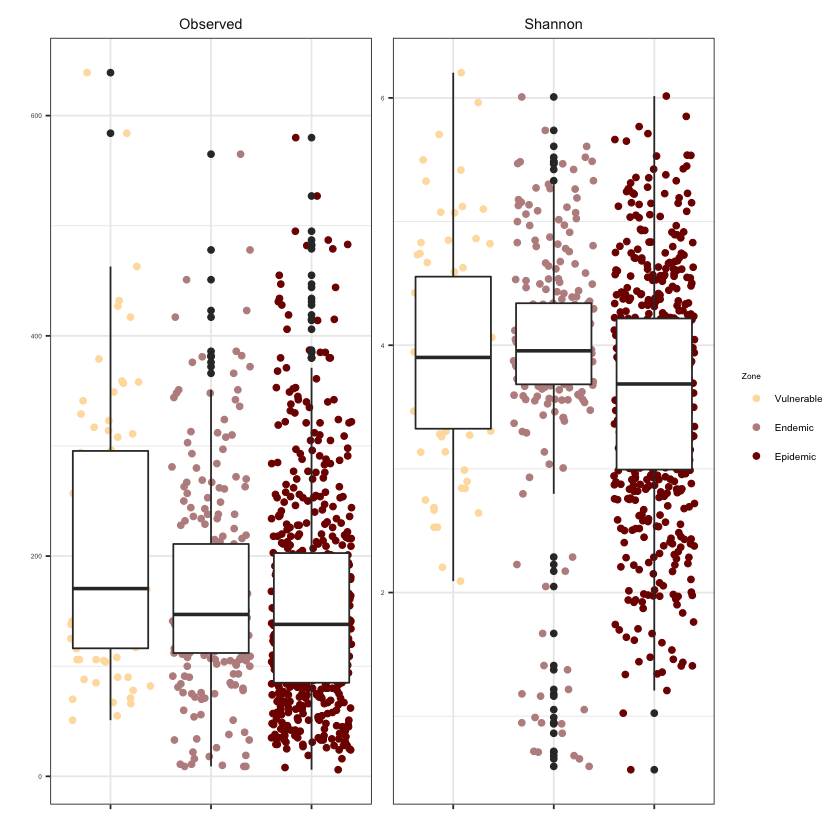

In [263]:
fig_alpha=  
  
ggplot(div_new, aes(x = Zone, y = value)) +

  geom_jitter(aes(color = Zone)) +
  geom_boxplot() +
theme_bw() +

scale_color_manual(values=c(
 "#FFDEAD","#BC8F8F", "#800000"
)) +
  labs(x = "", y = "")  +
  facet_wrap(.~ metric, scales = "free") +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =4)) +
theme(strip.background = element_blank()) 
fig_alpha

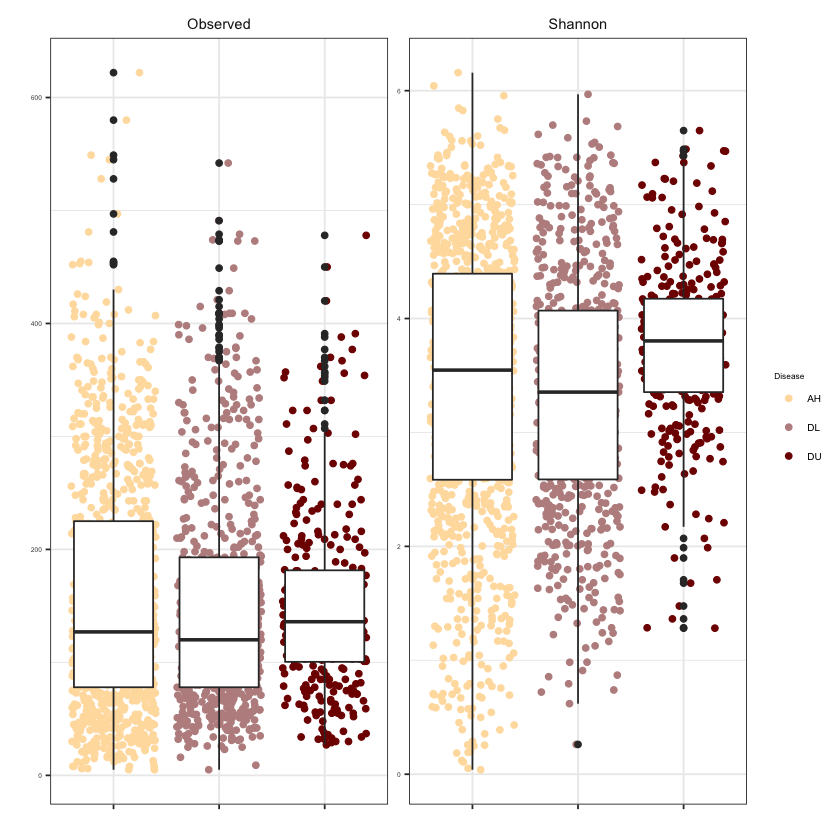

In [295]:
ggplot(div_new, aes(x = Disease, y = value)) +

  geom_jitter(aes(color = Disease)) +
  geom_boxplot() +
theme_bw() +

scale_color_manual(values=c(
 "#FFDEAD","#BC8F8F", "#800000"
)) +
  labs(x = "", y = "")  +
  facet_wrap(.~ metric, scales = "free") +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =4)) +
theme(strip.background = element_blank()) 

In [296]:
anova_ob =aov(Shannon ~ Disease, div)
anova_ob
TukeyHSD(anova_ob)

Call:
   aov(formula = Shannon ~ Disease, data = div)

Terms:
                  Disease Residuals
Sum of Squares    38.7132 2487.6771
Deg. of Freedom         2      1906

Residual standard error: 1.142446
Estimated effects may be unbalanced

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Shannon ~ Disease, data = div)

$Disease
             diff        lwr       upr     p adj
DL-AH -0.05803033 -0.1953501 0.0792894 0.5825088
DU-AH  0.35434143  0.1804558 0.5282271 0.0000056
DU-DL  0.41237176  0.2274095 0.5973340 0.0000006


In [125]:
anova_ob =aov(Shannon ~ Zone/Disease, div)
anova_ob
TukeyHSD(anova_ob)

Call:
   aov(formula = Shannon ~ Zone/Disease, data = div)

Terms:
                    Zone Zone:Disease Residuals
Sum of Squares   18.7835       9.0720  782.3668
Deg. of Freedom        2            4       870

Residual standard error: 0.9482996
2 out of 9 effects not estimable
Estimated effects may be unbalanced

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Shannon ~ Zone/Disease, data = div)

$Zone
                           diff        lwr         upr     p adj
Endemic-Vulnerable  -0.05320155 -0.3496732  0.24327008 0.9068226
Epidemic-Vulnerable -0.34515446 -0.6203611 -0.06994783 0.0093029
Epidemic-Endemic    -0.29195291 -0.4642065 -0.11969928 0.0002209

$`Zone:Disease`
                                    diff         lwr         upr     p adj
Endemic:AH-Vulnerable:AH    -0.175021453 -0.62816899  0.27812608 0.9562934
Epidemic:AH-Vulnerable:AH   -0.309823664 -0.72397128  0.10432395 0.3273261
Vulnerable:DL-Vulnerable:AH           NA          NA          NA        NA
Endemic:DL-Vulnerable:AH    -0.405773471 -1.13487217  0.32332523 0.7274677
Epidemic:DL-Vulnerable:AH   -0.410762049 -0.80404181 -0.01748229 0.0328584
Vulnerable:DU-Vulnerable:AH           NA          NA          NA        NA
Endemic:DU-Vulnerable:AH     0.113158965 -0.32482471  0.5511

In [133]:
anova_ob =aov(Observed ~ Zone/Disease, div)
anova_ob
TukeyHSD(anova_ob)

Call:
   aov(formula = Observed ~ Zone/Disease, data = div)

Terms:
                   Zone Zone:Disease Residuals
Sum of Squares   193413        34981   8596569
Deg. of Freedom       2            4       870

Residual standard error: 99.40379
2 out of 9 effects not estimable
Estimated effects may be unbalanced

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Observed ~ Zone/Disease, data = div)

$Zone
                         diff       lwr        upr     p adj
Endemic-Vulnerable  -41.32250 -72.39960 -10.245398 0.0052732
Epidemic-Vulnerable -53.48725 -82.33529 -24.639214 0.0000447
Epidemic-Endemic    -12.16475 -30.22092   5.891423 0.2540841

$`Zone:Disease`
                                  diff        lwr        upr     p adj
Endemic:AH-Vulnerable:AH    -37.525799  -85.02617   9.974571 0.2549729
Epidemic:AH-Vulnerable:AH   -60.211852 -103.62412 -16.799579 0.0006053
Vulnerable:DL-Vulnerable:AH         NA         NA         NA        NA
Endemic:DL-Vulnerable:AH    -21.019305  -97.44575  55.407145 0.9950302
Epidemic:DL-Vulnerable:AH   -46.734812  -87.95965  -5.509973 0.0131640
Vulnerable:DU-Vulnerable:AH         NA         NA         NA        NA
Endemic:DU-Vulnerable:AH    -48.179256  -94.09010  -2.268411 0.0313082
Epidemic:DU-Vulnerable:AH   -56.

In [135]:
div %>%
  group_by(Zone) %>%
  dplyr::summarise(median_observed = median(Observed),
            median_shannon = median(Shannon))

Zone,median_observed,median_shannon
<fct>,<dbl>,<dbl>
Vulnerable,170.5,3.901332
Endemic,147.0,3.954792
Epidemic,138.0,3.686521


In [141]:
ps.coral_clr <- microbiome::transform(ps.coral, 'clr')
ps.coral_TL_reef_CLR <- microbiome::transform(ps.coral_TL_reef, 'clr')
ps.coral_TL_meso_CLR <- microbiome::transform(ps.coral_TL_meso, 'clr')

ps.coral_clr.ord <- ordinate(ps.coral_clr, "RDA", "euclidean")
ps.coral_TL_meso_ord <- ordinate(ps.coral_TL_meso_CLR, "RDA", "euclidean")

ps.coral_TL_reef_ord <- ordinate(ps.coral_TL_reef_CLR, "RDA", "euclidean")

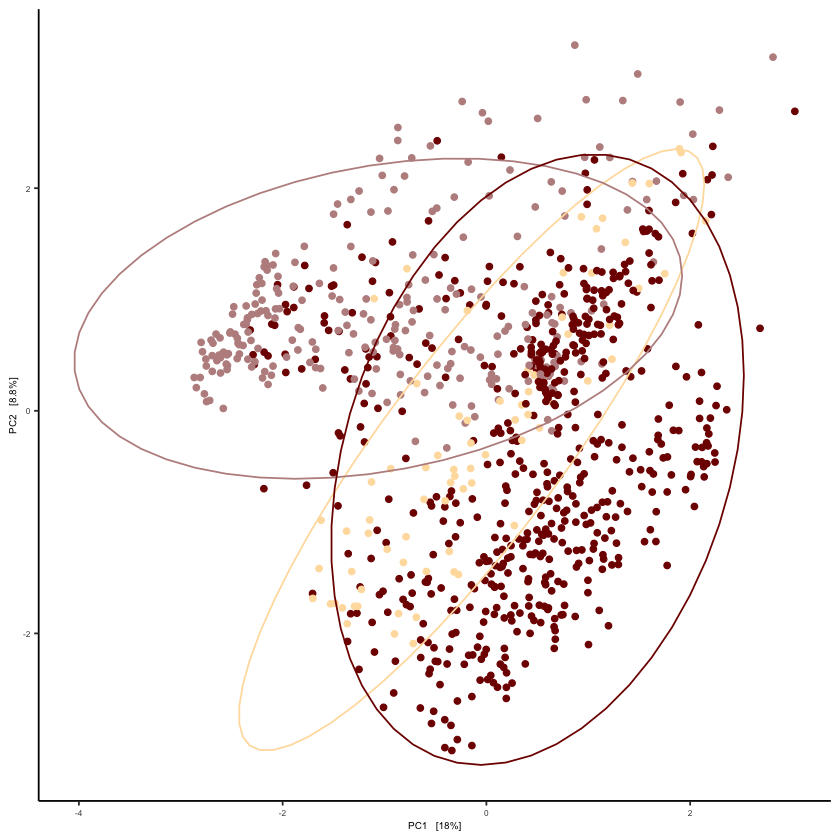

In [264]:
fig_ord_zone =plot_ordination(ps.coral_TL_reef_CLR, ps.coral_TL_reef_ord,
                               color="SCTLD_status",
                            
                               axes = c(1,2)) +

theme_classic() +
scale_color_manual(values=c("#FFDEAD","#BC8F8F", "#800000")) +
stat_ellipse() +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
labs(color='Zone') +
 theme(legend.position = "none",
      panel.grid.minor.x = element_blank())
fig_ord_zone

In [145]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [167]:
dis_clr <- vegdist(otu_table(t(ps.coral_TL_reef_CLR)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps.coral_TL_reef_CLR)$SCTLD_status)
mod_clr
mod_dist_clr= as.data.frame(mod_clr$distances)
dim(mod_dist_clr)
mod_dist_df_clr=cbind(sample_data(ps.coral_TL_reef_CLR), mod_dist_clr) 
head(mod_dist_df_clr)


	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group =
sample_data(ps.coral_TL_reef_CLR)$SCTLD_status)

No. of Positive Eigenvalues: 291
No. of Negative Eigenvalues: 0

Average distance to median:
Vulnerable    Endemic   Epidemic 
     42.48      44.08      43.16 

Eigenvalues for PCoA axes:
(Showing 8 of 291 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
339240 164828 112677  85461  50644  39854  27678  25891 

[1] 898   1

,SampleID,BioSample,Run,SRA_accession,Lab,Experiment,Alias,Study,Collection_ID,Species_counts,⋯,forwardPrimer,ReversePrimer,linkerPrimerSequence,platform,platformChemistry,sequencing_facility,barcodes,basepairs,notes,mod_clr$distances
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
102tiss_S3,102tiss_S3,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,102tiss,Low,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,47.19552
220tiss_S33,220tiss_S33,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,220tiss,High,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,52.43220
222tiss_S34,222tiss_S34,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,222tiss,High,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,34.99772
225tis_S40,225tis_S40,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,225tis,High,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,35.70928
232tiss_S41,232tiss_S41,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,232tiss,High,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,54.49090
262tiss_S35,262tiss_S35,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,USVI:2021Becker_etal,262tiss,High,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,43.35497


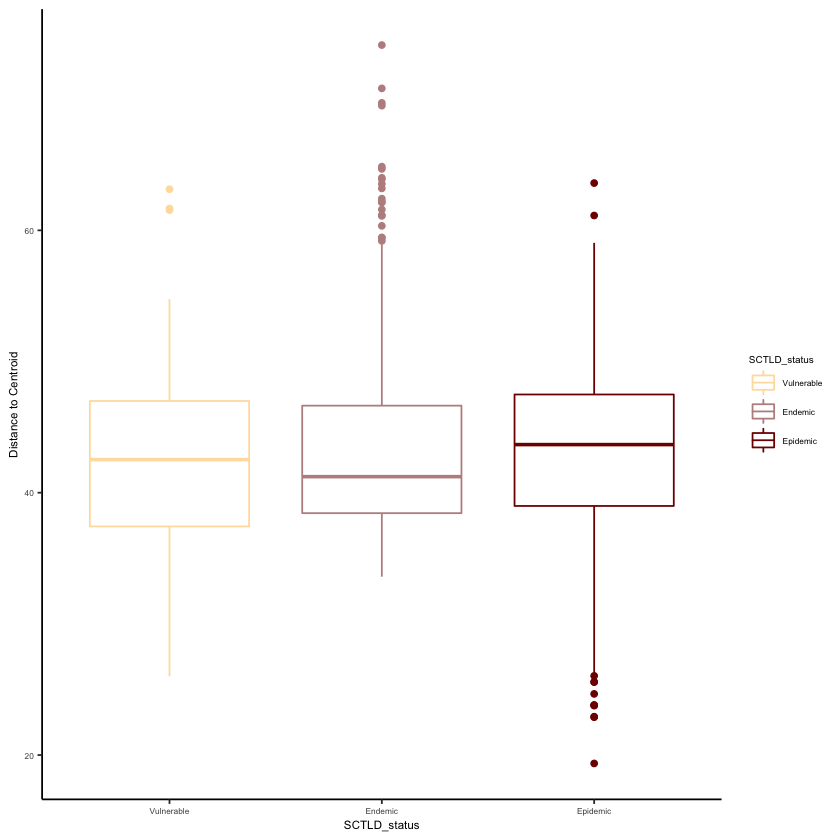

In [152]:
mod_dist_df_clr$tissue_type = factor(mod_dist_df_clr$tissue_type,
                                  c("AH", "DU", "DL")) 


ggplot(mod_dist_df_clr,
       aes(x=SCTLD_status, y=mod_clr$distances)) +
geom_boxplot(aes(color=SCTLD_status)) +
#scale_color_manual(values = cbPalette) +
theme_linedraw() +
theme_classic() +
ylab("Distance to Centroid") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +

scale_color_manual(values=c("#FFDEAD","#BC8F8F", "#800000"))

In [168]:
?ggarrange

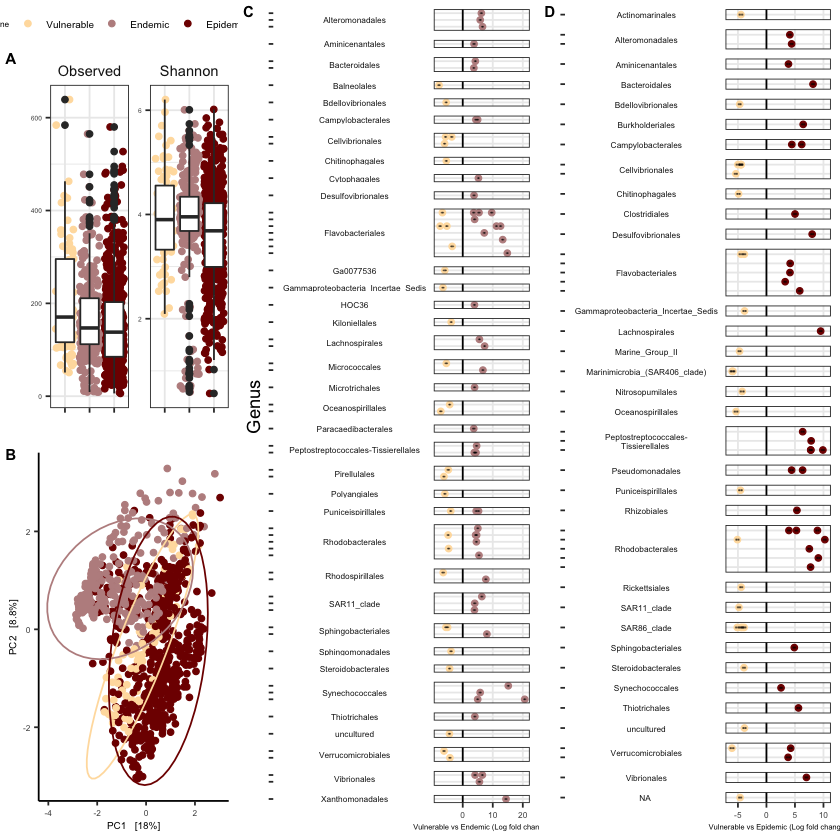

In [284]:
left = ggpubr::ggarrange(fig_alpha, fig_ord_zone, labels = c("A", "B"), common.legend = TRUE, 
                  font.label = list(size = 9, color = "black"), nrow =2)
right = ggpubr::ggarrange(fig_sigs_end, fig_sigs_epi, labels = c( "C", "D"),
                  font.label = list(size = 9, color = "black"))
ggpubr::ggarrange(left, right,  ncol =2, widths = c(0.79, 2), common.legend = TRUE)

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/Zones.png",
     width = 7.6, height = 6, units = "in", dpi=300)

In [285]:
library(DivNet)

Loading required package: breakaway



In [290]:
library(phyloseq)
data(Lee)
divnet_phylum <-  divnet(tax_glom(ps.coral_TL_reef, taxrank="Order"),
                         X = "SCTLD_status",
                         ncores = 4)
divnet_phylum